In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
two_dice_image = cv2.imread("input/2_dice.png", cv2.IMREAD_GRAYSCALE)

In [21]:
def find_contours(image):
    contours_detected = []

    for row,col in np.ndindex(image.shape):
        if image[row , col] == 255:
            contour = []
            new = [(col , row)]
            image [row , col] = 0
            while len(new) > 0 :
                y , x = new.pop()
                contour.append((y , x))
                for dx , dy in [(0 , 1) , (0 , -1) , (1 , 0) , (-1 , 0) , (1 , 1) , (1 , -1) , (-1 , 1) , (-1 , -1)] :
                    i = x + dx
                    j = y + dy
                    if 0 < i < image.shape[0] and 0 < j < image.shape[1] :
                        if image[i , j] == 255 :
                            image[i , j] = 0
                            new.append ((j , i))

            contours_detected.append(np.array (contour))
    return contours_detected

In [22]:
noise_reduced_image = cv2.medianBlur(two_dice_image, 7)
_, threshold_image = cv2.threshold(noise_reduced_image, 180, 255, cv2.THRESH_BINARY_INV)

### open-cv built in function

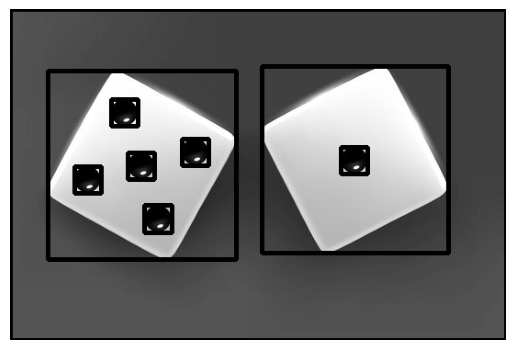

In [23]:
contours , _ = cv2.findContours(threshold_image , cv2.RETR_LIST , cv2.CHAIN_APPROX_NONE)
result = two_dice_image.copy()

for contour in contours :
    x, y, w, h = cv2.boundingRect (contour)
    cv2.rectangle (result , (x,y) , (x+w,y+h) , (0 , 0 , 0) , 3)

plt.imshow(result, "grey")
plt.axis(False)
plt.show()

#### my function

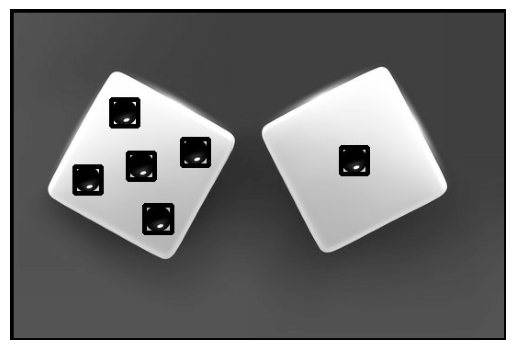

In [24]:
contours = find_contours(threshold_image)
result = two_dice_image.copy()

for contour in contours :
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle (result , (x,y) , (x+w,y+h) , (0 , 0 , 0) , 3)

plt.imshow(result, "grey")
plt.axis(False)
plt.show()